<a href="https://colab.research.google.com/github/ddenebb/IT_Academy_Final_Project/blob/V1/Barcelona_Air_BnB_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this [link ](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)we can find a dictionary describing the dataset´s fields

In [1]:
import pandas as pd

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_September_2022.csv')

# Load the second listing file
df2 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_11_December_2022.csv')

# Load the third listing file
df3 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_14_March_2023.csv')

# Load the fourth listing file
df4 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_June_2023.csv')

# Combine the dataframes into a single dataframe
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

combined_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65583 entries, 0 to 65582
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            65583 non-null  int64  
 1   listing_url                                   65583 non-null  object 
 2   scrape_id                                     65583 non-null  int64  
 3   last_scraped                                  65583 non-null  object 
 4   source                                        65583 non-null  object 
 5   name                                          65555 non-null  object 
 6   description                                   65221 non-null  object 
 7   neighborhood_overview                         38203 non-null  object 
 8   picture

In [2]:
# # Examine the dataset's shape
combined_df.shape

(65583, 75)

The function you provided calculates the percentage of missing data for each column in the DataFrame combined_df. It prints the column name and the corresponding percentage of missing data.

To determine at which point you need to consider processing or handling the missing data, it depends on the specific requirements of your analysis and the machine learning models you plan to use.

In [3]:
def check_missing_value(column:'str'):
    print(f'Percentage of Missing data in \033[1m"{column}"\033[0m is \033[1m{round(combined_df[column].isna().sum()/combined_df[column].shape[0] * 100, 2)} %\033[0m')
for x in combined_df.columns:
    check_missing_value(x)

Percentage of Missing data in "id" is 0.0 %
Percentage of Missing data in "listing_url" is 0.0 %
Percentage of Missing data in "scrape_id" is 0.0 %
Percentage of Missing data in "last_scraped" is 0.0 %
Percentage of Missing data in "source" is 0.0 %
Percentage of Missing data in "name" is 0.04 %
Percentage of Missing data in "description" is 0.55 %
Percentage of Missing data in "neighborhood_overview" is 41.75 %
Percentage of Missing data in "picture_url" is 0.0 %
Percentage of Missing data in "host_id" is 0.0 %
Percentage of Missing data in "host_url" is 0.0 %
Percentage of Missing data in "host_name" is 0.01 %
Percentage of Missing data in "host_since" is 0.01 %
Percentage of Missing data in "host_location" is 21.9 %
Percentage of Missing data in "host_about" is 36.28 %
Percentage of Missing data in "host_response_time" is 17.95 %
Percentage of Missing data in "host_response_rate" is 17.95 %
Percentage of Missing data in "host_acceptance_rate" is 15.79 %
Percentage of Missing data in

Typically, there is no fixed threshold for the percentage of missing data that universally applies to all situations. However, you can consider the following general guidelines:



*   Low Missing Data Percentage: If a column has a very low percentage of missing
data (e.g., less than 5%), you might choose to simply drop the rows with missing values or use imputation methods to fill in the missing values.
*   Moderate Missing Data Percentage: For columns with a moderate percentage of missing data (e.g., between 5% and 20%), you can explore more sophisticated imputation techniques, such as mean or median imputation, regression imputation, or using machine learning models to predict the missing values.

*   High Missing Data Percentage: If a column has a high percentage of missing data (e.g., more than 20% or 30%), you may consider removing the column entirely from your analysis, as the missing data might significantly impact the accuracy of the model.

It's crucial to assess the nature of missing data and the impact it may have on your analysis. You should also consider the context of the specific dataset and the potential biases that might be introduced by handling missing data in a particular way.

Before making any decisions on how to handle missing data, you may also want to analyze the patterns of missingness across different columns. If multiple columns have missing values for the same rows, it may suggest a pattern that requires special consideration.

In summary, there is no fixed threshold for handling missing data, and the approach should be driven by the nature of the dataset and the specific analysis goals. Always ensure that any imputation or handling of missing data is well-documented and carefully considered to avoid introducing biases or inaccuracies in your analysis.

In [4]:
print(combined_df['price'].dtype)

object


Convert Price to Numeric: The 'price' column is currently of object data type. To perform numerical operations and analysis, it's better to convert it to a numeric data type. Remove the dollar sign ($) and any other non-numeric characters, and convert it to a float or integer data type. For example:

In [5]:
combined_df['price'] = combined_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


<ipython-input-5-b766fbdbe8c5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_df['price'] = combined_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [6]:
print(combined_df['price'].dtype)

float64


In [7]:
outlier = combined_df[(combined_df['price'] > 1000)]
outlier.count

<bound method DataFrame.count of                        id                                      listing_url  \
296                602374              https://www.airbnb.com/rooms/602374   
1059              2439285             https://www.airbnb.com/rooms/2439285   
1477              4200509             https://www.airbnb.com/rooms/4200509   
1842              5793703             https://www.airbnb.com/rooms/5793703   
1968              6666212             https://www.airbnb.com/rooms/6666212   
...                   ...                                              ...   
63382  808538407310687262  https://www.airbnb.com/rooms/808538407310687262   
63752  830950455051439372  https://www.airbnb.com/rooms/830950455051439372   
64291  851285541984761369  https://www.airbnb.com/rooms/851285541984761369   
64338  852056501470483793  https://www.airbnb.com/rooms/852056501470483793   
64725  871663364915243450  https://www.airbnb.com/rooms/871663364915243450   

            scrape_id last_scr

In [8]:
import pandas as pd

# Step 1: Convert 'last_scraped' column to datetime for date comparison
combined_df['last_scraped'] = pd.to_datetime(combined_df['last_scraped'])

# Filter out outdated entries (e.g., listings after September 10, 2022)
cutoff_date = pd.to_datetime('2022-09-10')
combined_df = combined_df[combined_df['last_scraped'] <= cutoff_date]

# Step 2: Remove irrelevant columns (e.g., 'scrape_id', 'source', etc.)
columns_to_remove = ['scrape_id', 'source', 'host_url', 'host_thumbnail_url', "first_review", "host_neighbourhood", "neighbourhood", "bathrooms", 'calendar_updated', "last_review", "review_scores_rating" ,"review_scores_accuracy" , "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" , "license", "reviews_per_month"]  # List all irrelevant columns
combined_df.drop(columns=columns_to_remove, inplace=True)

# Finally, reset the index after filtering
combined_df.reset_index(drop=True, inplace=True)


<ipython-input-8-91e83347ca13>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.drop(columns=columns_to_remove, inplace=True)


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            5733 non-null   int64         
 1   listing_url                                   5733 non-null   object        
 2   last_scraped                                  5733 non-null   datetime64[ns]
 3   name                                          5733 non-null   object        
 4   description                                   5709 non-null   object        
 5   neighborhood_overview                         3414 non-null   object        
 6   picture_url                                   5733 non-null   object        
 7   host_id                                       5733 non-null   int64         
 8   host_name                                     5733 non-null   object

In this code, the drop() function is used to remove the rows that satisfy the conditions specified in outliers. The .index attribute is used to get the index labels of the rows to be dropped. By passing these index labels to drop(), the rows are deleted from the dataframe.

After removing the rows, the index may have gaps due to the deletion. If you want to reset the index to have consecutive integer values, you can use the reset_index() function with the drop=True parameter.

In [10]:
# Identify the rows with price > 1000
outliers = (combined_df['price'] > 1000)

# Remove the identified rows
combined_df = combined_df.drop(combined_df[outliers].index)

# Reset the index if needed
combined_df = combined_df.reset_index(drop=True)


In [11]:
column_list = combined_df.columns.tolist()
print(column_list)

['id', 'listing_url', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 'c

Handle Missing Values in Bedrooms: The 'bedrooms' column has some missing values. You can either drop the rows with missing values or fill them with a suitable value (e.g., mean, median, or mode). If you choose to fill the missing values, you can use the fillna() method. For example, to fill with the most frequent:

In [12]:
# Calculate the most frequent value (mode) of the 'bedrooms' column
most_frequent_bedrooms = combined_df['bedrooms'].mode().iloc[0]

# Replace missing values with the most frequent value
combined_df['bedrooms'].fillna(most_frequent_bedrooms, inplace=True)

# Now the missing values in the 'bedrooms' column have been replaced with the most frequent value.


In [13]:
combined_df['last_scraped'] = pd.to_datetime(combined_df['last_scraped'])

Further Feature Engineering: Consider extracting additional information from features like 'amenities' or creating new features based on your domain knowledge. For example, you could extract the number of amenities or create binary columns indicating the presence of specific amenities.

In [14]:
combined_df['amenities_count'] = combined_df['amenities'].apply(lambda x: len(eval(x)))
combined_df['has_pool'] = combined_df['amenities'].str.contains('Pool').astype(int)
combined_df['AC'] = combined_df['amenities'].str.contains('Air conditioning').astype(int)



In this code, the 'amenities' from the dataframe df are concatenated into a single string using ' '.join(df['amenities']). Then, the string is split into a list of individual amenities using split(','), assuming that each amenity is separated by a comma.

Next, any leading or trailing whitespaces are removed from each amenity using .strip(). Finally, list(set(amenities_list)) is used to get unique amenities by converting the list into a set (which eliminates duplicates) and then back to a list.

To assign a unique code to each unique neighborhood, you can create a mapping dictionary where each unique neighborhood is associated with a unique code. Here's an example code snippet:

In this code, unique_neighborhoods stores all the unique neighborhood names from the 'neighbourhood_cleansed' column. Then, a dictionary neighborhood_code_map is created, where each unique neighborhood is mapped to a unique code using the enumerate() function.

Finally, the map() function is used to map the neighborhood names in the 'neighbourhood_cleansed' column to their respective codes from the neighborhood_code_map dictionary. The codes are then stored in a new column called 'neighborhood_code' in the dataframe df.

Now, you can use the 'neighborhood_code' column to represent neighborhoods in the heatmap or any other visualization where numerical codes are required instead of the original neighborhood names.

In [15]:
# Get unique neighborhoods
unique_neighborhoods = combined_df['neighbourhood_cleansed'].unique()

# Create a mapping dictionary for neighborhood codes
neighborhood_code_map = {neighborhood: code for code, neighborhood in enumerate(unique_neighborhoods)}

# Add a new column 'neighborhood_code' to the dataframe
combined_df['neighborhood_code'] = combined_df['neighbourhood_cleansed'].map(neighborhood_code_map)


 As I have the neighborhood code as a representative of the neighborhoods, I can remove the 'latitude' and 'longitude' columns from the dataframe:

In [16]:
# Drop latitude and longitude columns
combined_df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [17]:
# Concatenate all amenities into a single string
all_amenities = ' '.join(combined_df['amenities'])

# Split the string by commas and remove leading/trailing whitespaces
amenities_list = [amenity.strip() for amenity in all_amenities.split(',')]

# Get unique amenities
unique_amenities = list(set(amenities_list))

# Print the unique amenities
print(unique_amenities)

['"Elevator"] ["Private entrance"', '"Fast wifi \\u2013 170 Mbps"', '"Free washer \\u2013 In unit"] ["Free residential garage on premises"', '"Self check-in"', '"Gel de gucha  marcha Auchan gen\\u00e9rico body soap"', '"Yamaha sound system with aux"', '"42\\" HDTV with Netflix"', '"Children\\u2019s books and toys"', '"60\\" HDTV with standard cable', 'wardrobe', '"Private outdoor pool - "', '"Induktion electric stove"', '"AC - split type ductless system"] ["Cable TV"', '"A&G oven"] ["Fire extinguisher"', '"Smoke alarm"] ["Cooking basics"', '"BBQ grill"', '"Beachfront"] ["Mini fridge"', '"Blanca  shampoo"', '"Private entrance"', '"Garnier body soap"', '"Fast wifi \\u2013 52 Mbps"', '"48\\" HDTV with Amazon Prime Video', '"Building staff"] ["Central heating"', '"Usually Revlon. conditioner"', '"Luggage dropoff allowed"] ["Fire extinguisher"', '"Patio or balcony"] ["Mini fridge"', '"Whirpool stainless steel oven"', '"Dedicated workspace"', '"60\\" HDTV with Netflix"', '"Coffee maker"] ["F

<ipython-input-18-0d33d04760a9>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = combined_df.corr()


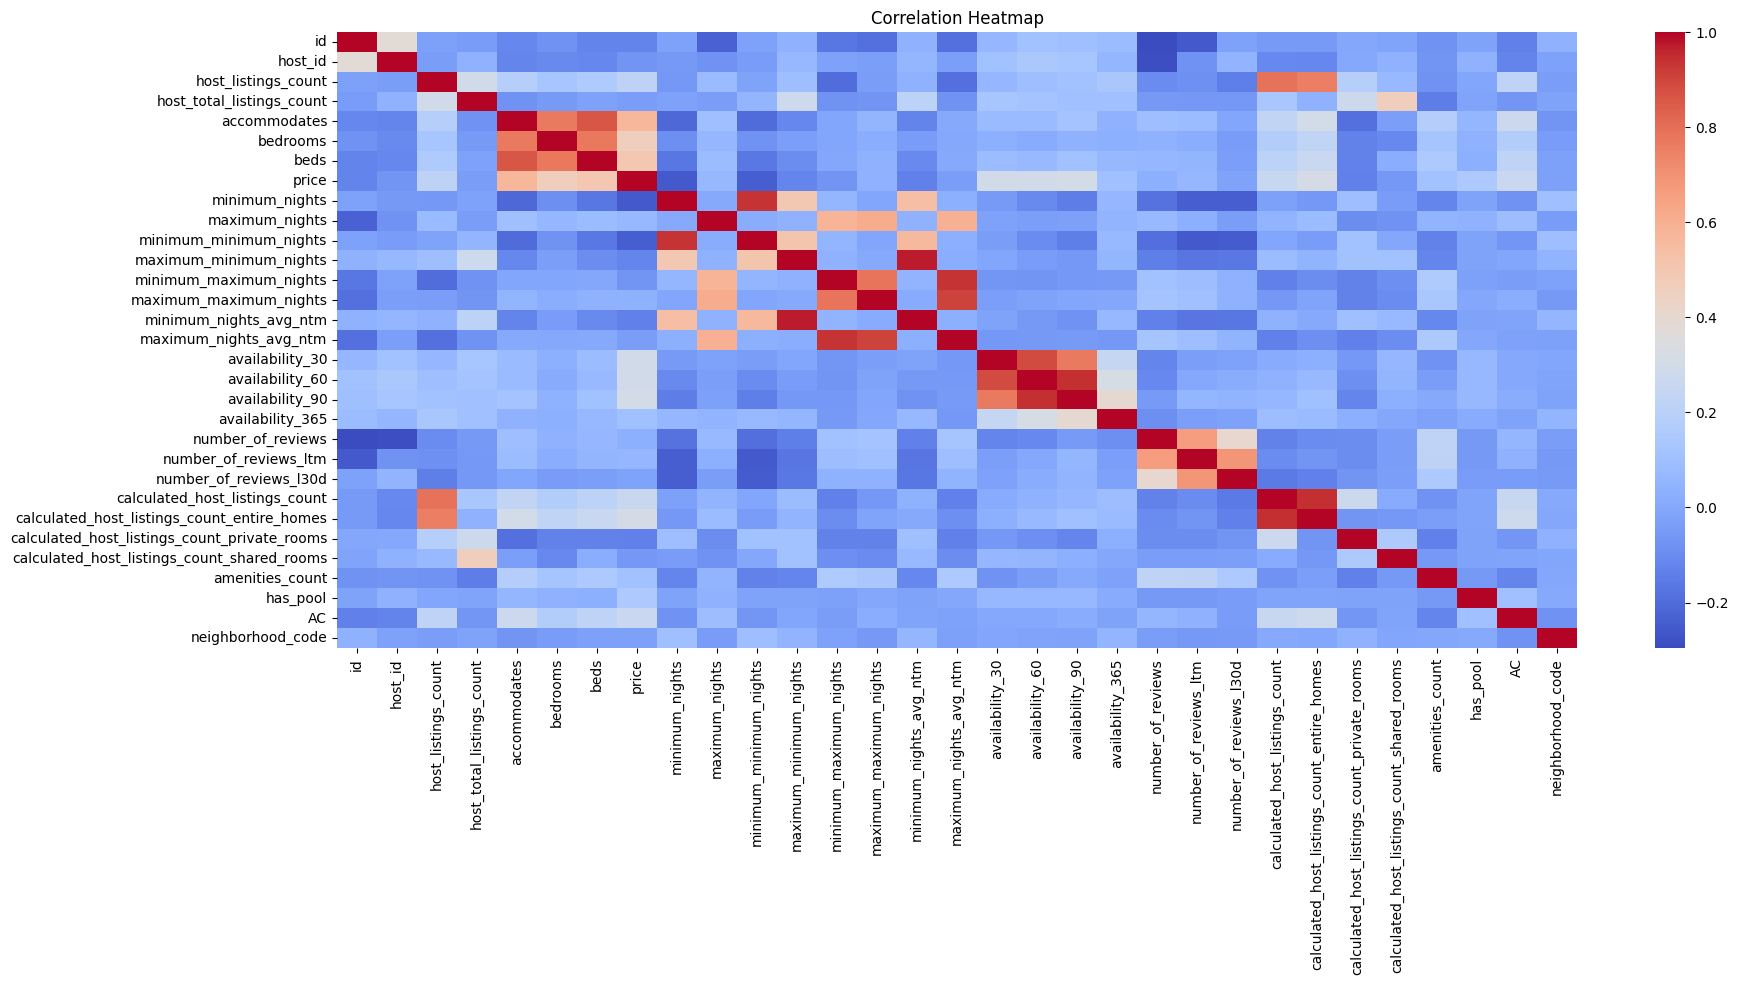

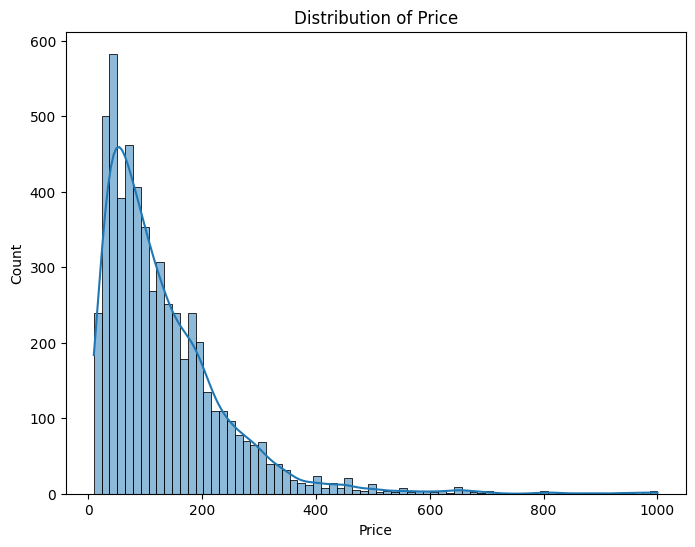

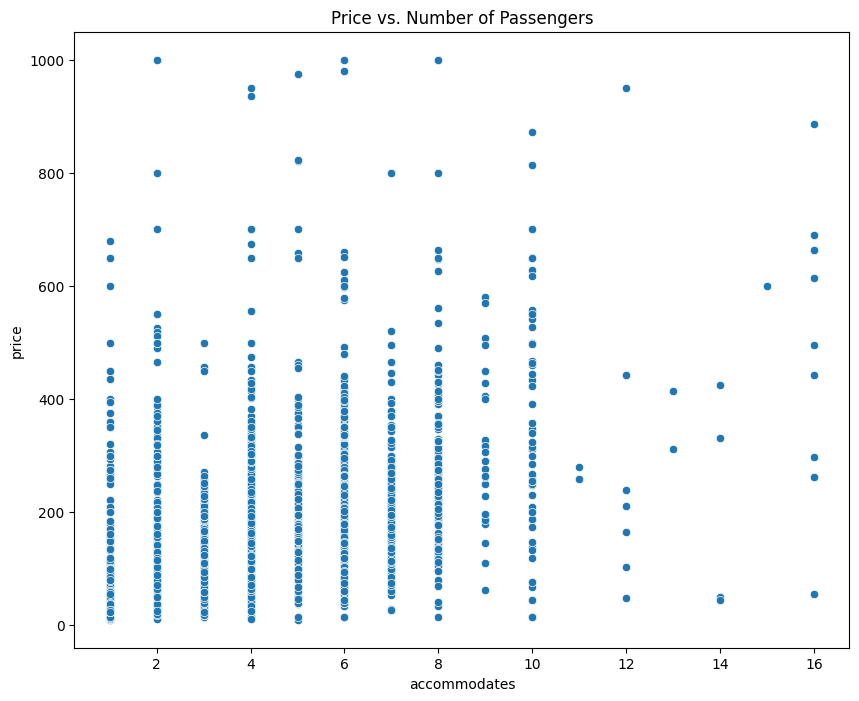

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset
#print(combined_df.info())  # Display information about the dataset, such as column names and data types
#print(combined_df.describe())  # Get summary statistics of numerical columns

# Correlation analysis
correlation = combined_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Visualize relationships between variables
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='accommodates', y='price')
plt.title('Price vs. Number of Passengers')
plt.show()

# Continue with more exploratory analysis and visualization as per your requirements


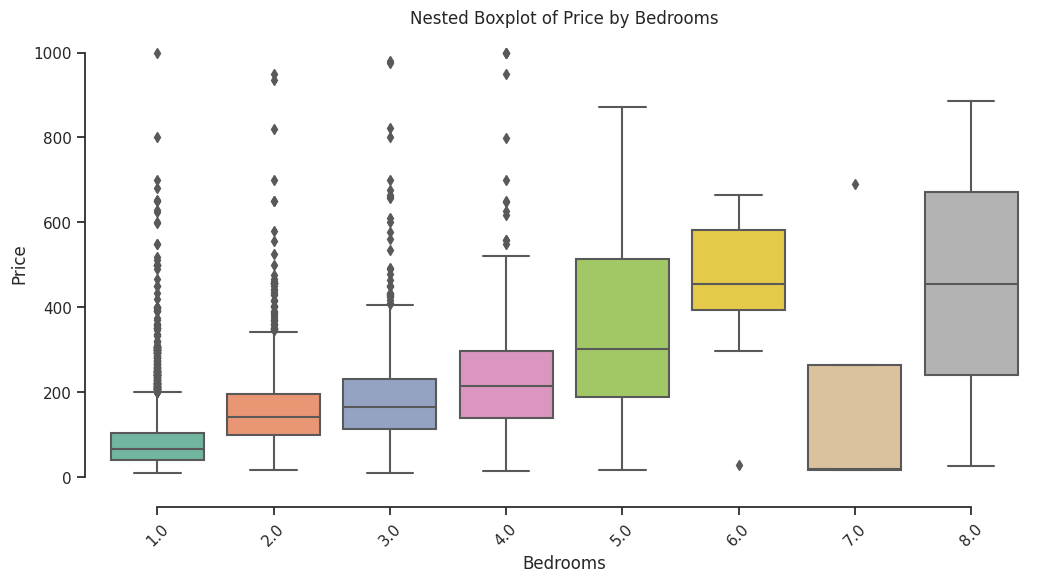

In [19]:
# Set the seaborn theme and palette
sns.set_theme(style="ticks", palette="pastel")

# Adjust figure size
plt.figure(figsize=(12, 6))

# Draw the nested boxplot
sns.boxplot(x="bedrooms", y="price",
            palette="Set2",
            data=combined_df)
sns.despine(offset=10, trim=True)

# Adjust plot title and axes labels
plt.title('Nested Boxplot of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [20]:
bedrooms_stats = combined_df['bedrooms'].describe()
print(bedrooms_stats)

count    5668.000000
mean        1.779287
std         0.981107
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: bedrooms, dtype: float64


To analyze the relationship between property characteristics (property type, room type, number of bedrooms) and the number of accommodates to predict the demand for different types of rental properties in different neighborhoods, you can use various data visualization techniques and machine learning models.
In this example, we first import libraries and preprocess the data by removing rows with missing values in the "accommodates" column. We then visualize the relationships between "accommodates" and other variables using scatter plots and box plots. Finally, we build a linear regression model to predict the number of accommodates based on property characteristics.

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# Drop any rows with missing values in the "accommodates" column
combined_df = combined_df.dropna(subset=['accommodates'])

Data Visualization

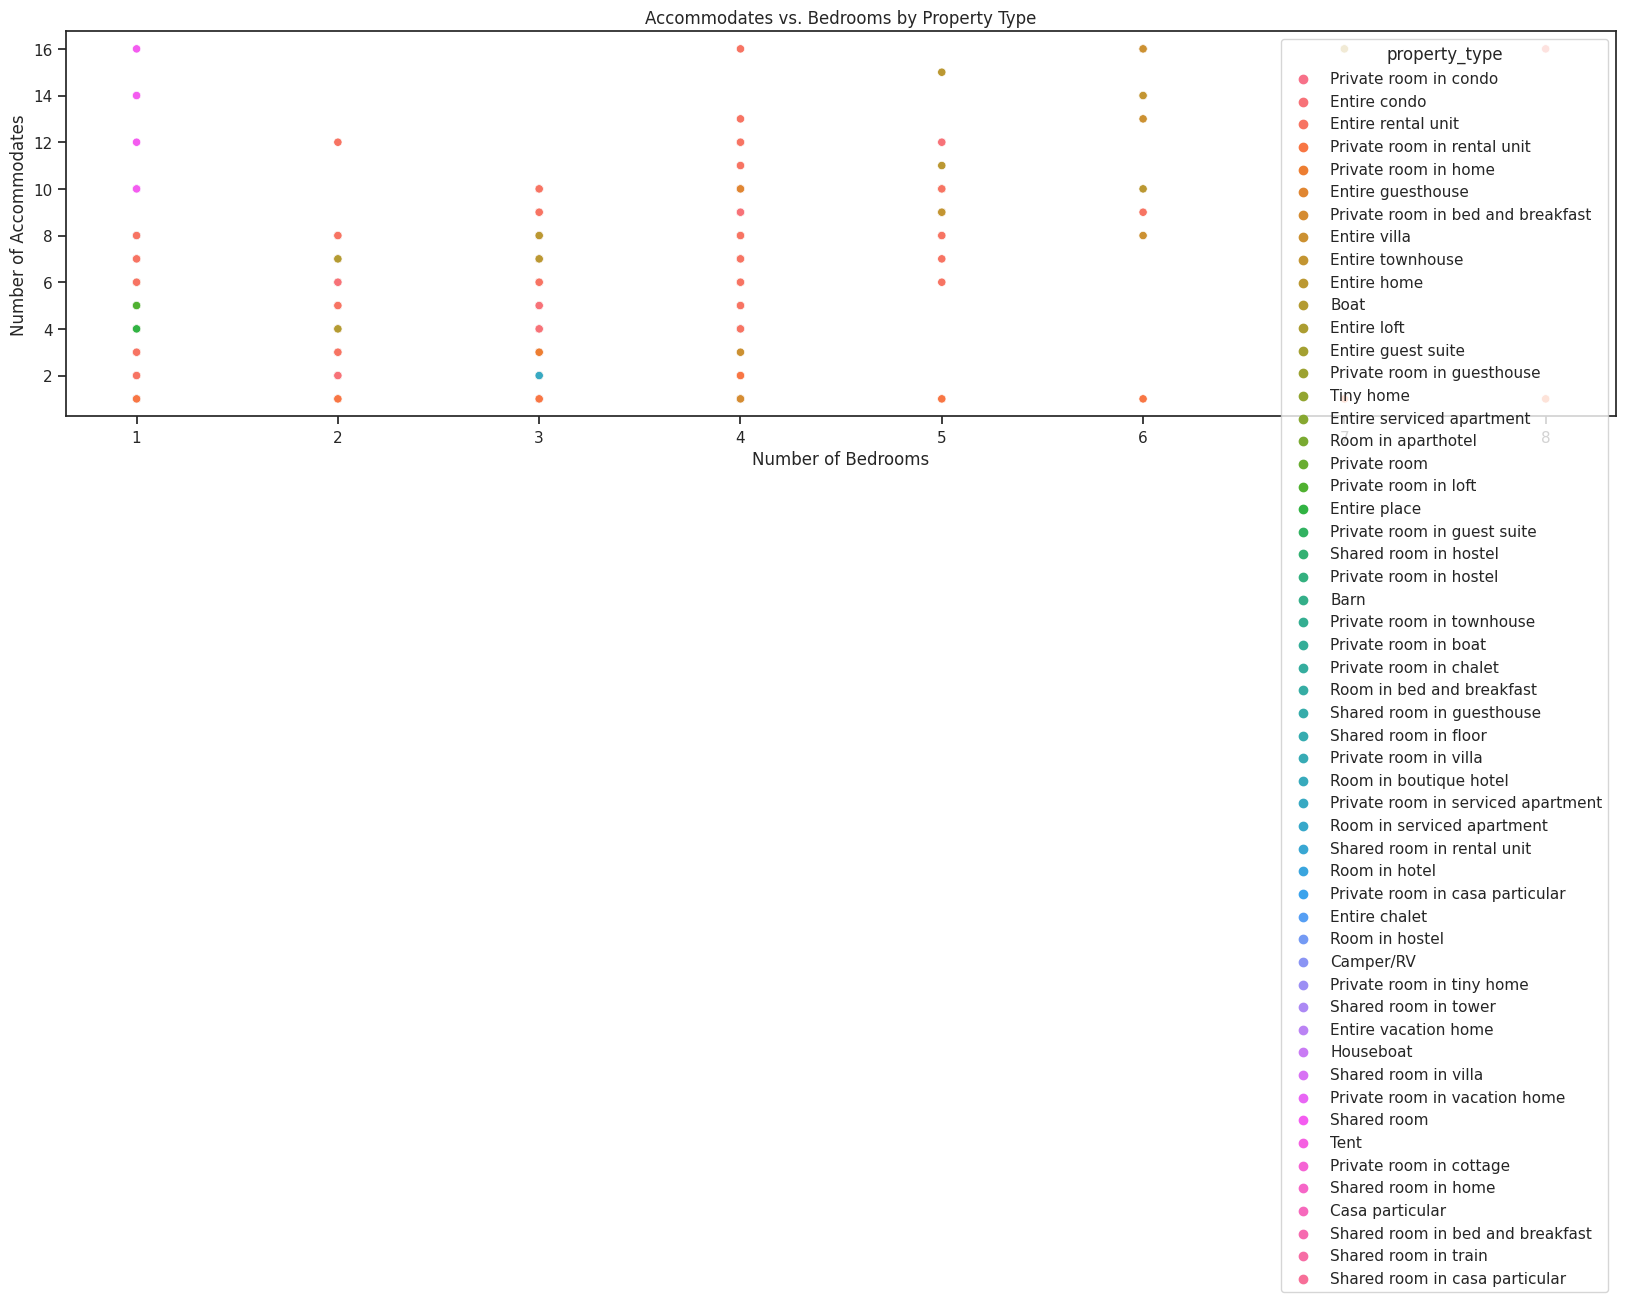

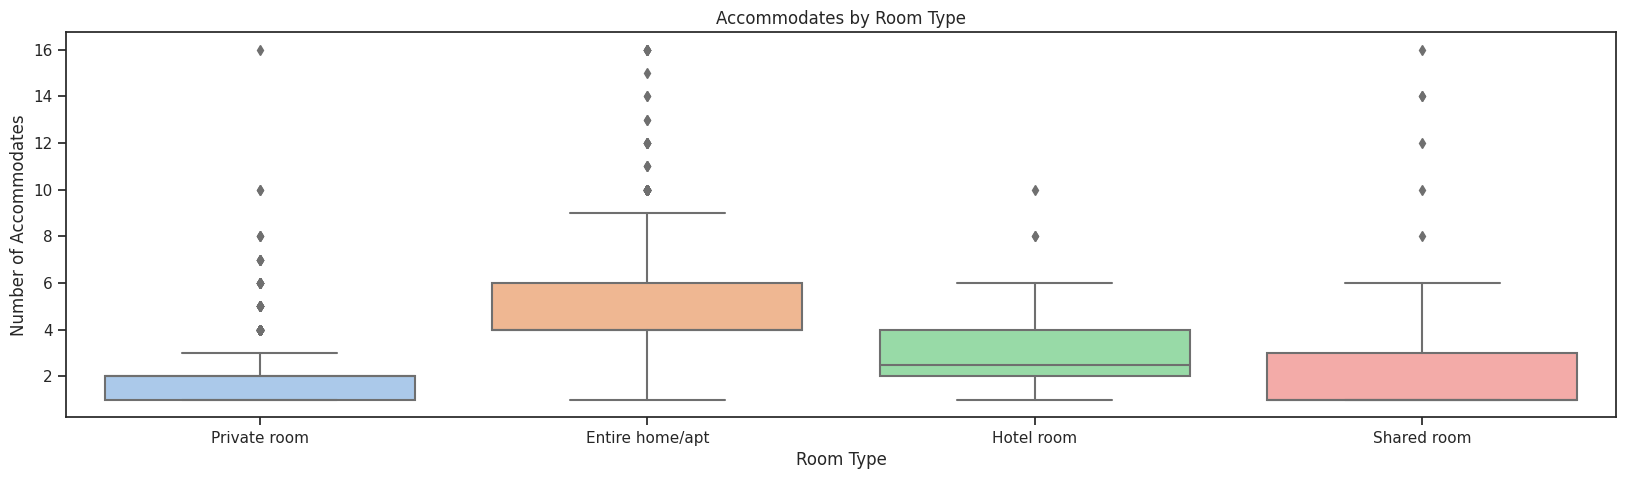

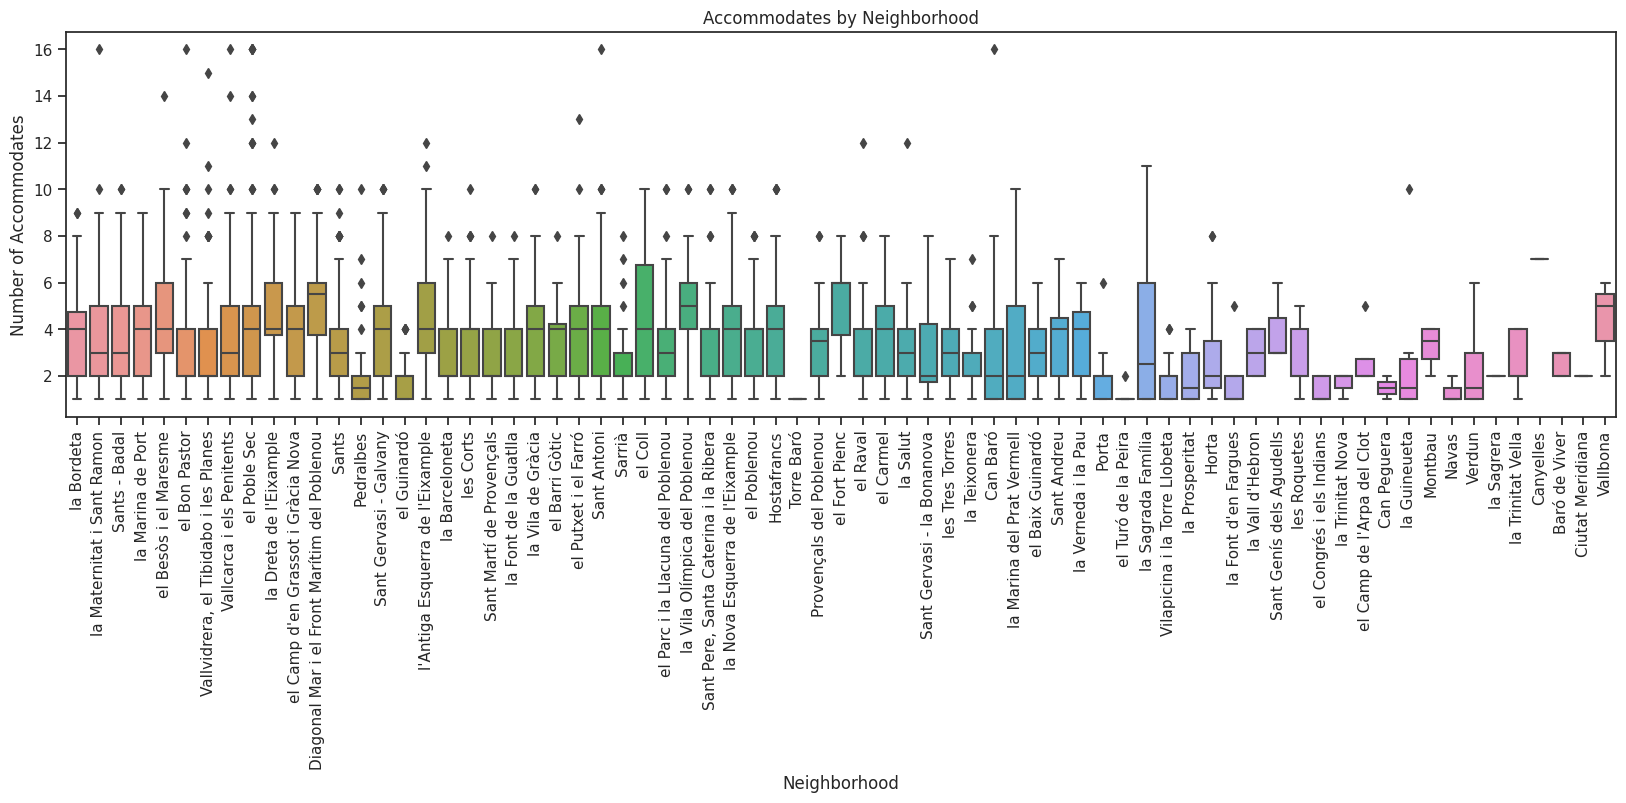

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to be 4 times wider
plt.figure(figsize=(20, 5))

# Visualize the relationship between "accommodates" and other variables using scatter plots or box plots
sns.scatterplot(data=combined_df, x='bedrooms', y='accommodates', hue='property_type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Accommodates')
plt.title('Accommodates vs. Bedrooms by Property Type')
plt.show()

# Set the figure size to be three times wider
plt.figure(figsize=(20, 5))

sns.boxplot(data=combined_df, x='room_type', y='accommodates')
plt.xlabel('Room Type')
plt.ylabel('Number of Accommodates')
plt.title('Accommodates by Room Type')
plt.show()

# Set the figure size to be three times wider
plt.figure(figsize=(20, 5))

sns.boxplot(data=combined_df, x='neighbourhood_cleansed', y='accommodates')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Accommodates')
plt.title('Accommodates by Neighborhood')
plt.show()



Model Building using a linear regression model to predict the 'accommodates' based on the features 'property_type', 'room_type', and 'bedrooms'.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'mean', 'median', or 'most_frequent'

# Define column transformer to apply imputer and one-hot encoding to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, ['bedrooms']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
    ],
    remainder='passthrough'  # Keeps other columns as they are
)

# Create the pipeline with preprocessing and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1.2785174253175517


In [25]:
print(combined_df['accommodates'].describe())


count    5668.000000
mean        3.620148
std         2.156534
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        16.000000
Name: accommodates, dtype: float64


Model Building using a decision tree regressor model to predict the 'accommodates' based on the features 'property_type', 'room_type', and 'bedrooms'.

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Create the pipeline with preprocessing and Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.217388803020085


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'mean', 'median', or 'most_frequent'

# Define column transformer to apply imputer and one-hot encoding to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, ['bedrooms']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
    ],
    remainder='passthrough'  # Keeps other columns as they are
)

# Create the pipeline with preprocessing and RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.1944823594036869


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'mean', 'median', or 'most_frequent'

# Define column transformer to apply imputer and one-hot encoding to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, ['bedrooms']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
    ],
    remainder='passthrough'  # Keeps other columns as they are
)

# Create the pipeline with preprocessing and GradientBoostingRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.1826921743124994


In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'mean', 'median', or 'most_frequent'

# Define column transformer to apply imputer and one-hot encoding to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, ['bedrooms']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
    ],
    remainder='passthrough'  # Keeps other columns as they are
)

# Create the pipeline with preprocessing and Support Vector Regression (SVR)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.6071740974393978


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Encode categorical features
encoder = LabelEncoder()
X['property_type'] = encoder.fit_transform(X['property_type'])
X['room_type'] = encoder.fit_transform(X['room_type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (bedrooms)
scaler = StandardScaler()
X_train['bedrooms'] = scaler.fit_transform(X_train[['bedrooms']])
X_test['bedrooms'] = scaler.transform(X_test[['bedrooms']])

# Create a neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


<ipython-input-30-508d08ddea8c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['property_type'] = encoder.fit_transform(X['property_type'])
<ipython-input-30-508d08ddea8c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room_type'] = encoder.fit_transform(X['room_type'])


Epoch 1/50
128/128 [==============================] - 1s 4ms/step - loss: 10.7942 - val_loss: 5.1904
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 2.7776 - val_loss: 1.5332
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 1.8273 - val_loss: 1.4130
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 1.6680 - val_loss: 1.3188
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 1.5915 - val_loss: 1.3535
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 1.5679 - val_loss: 1.3567
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 1.5496 - val_loss: 1.3393
Epoch 8/50
128/128 [==============================] - 0s 3ms/step - loss: 1.5536 - val_loss: 1.3039
Epoch 9/50
128/128 [==============================] - 0s 4ms/step - loss: 1.5365 - val_loss: 1.3628
Epoch 10/50
128/128 [==============================] - 0s 4ms/step - loss: 1.5688 - val_loss: 1.321

I will plot a graphic to compare the performance of the six models:



*   LinearRegressor
*   DecisionTreeRegressor
*   RandomForestRegressor
*   GradientBoostingRegressor
*   Support Vector Regression (SVR)
*   Neural networks (using libraries like TensorFlow or PyTorch)







First, I will train and evaluate each model on the same dataset. Then, I will collect the mean squared error (MSE), mean absolute error (MAE) and R-squared (R2) evaluation metrics for each model and create a bar plot to visualize their performance.

<ipython-input-31-b214eb20a011>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['property_type'] = encoder.fit_transform(X['property_type'])
<ipython-input-31-b214eb20a011>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room_type'] = encoder.fit_transform(X['room_type'])


36/36 [==============================] - 0s 1ms/step


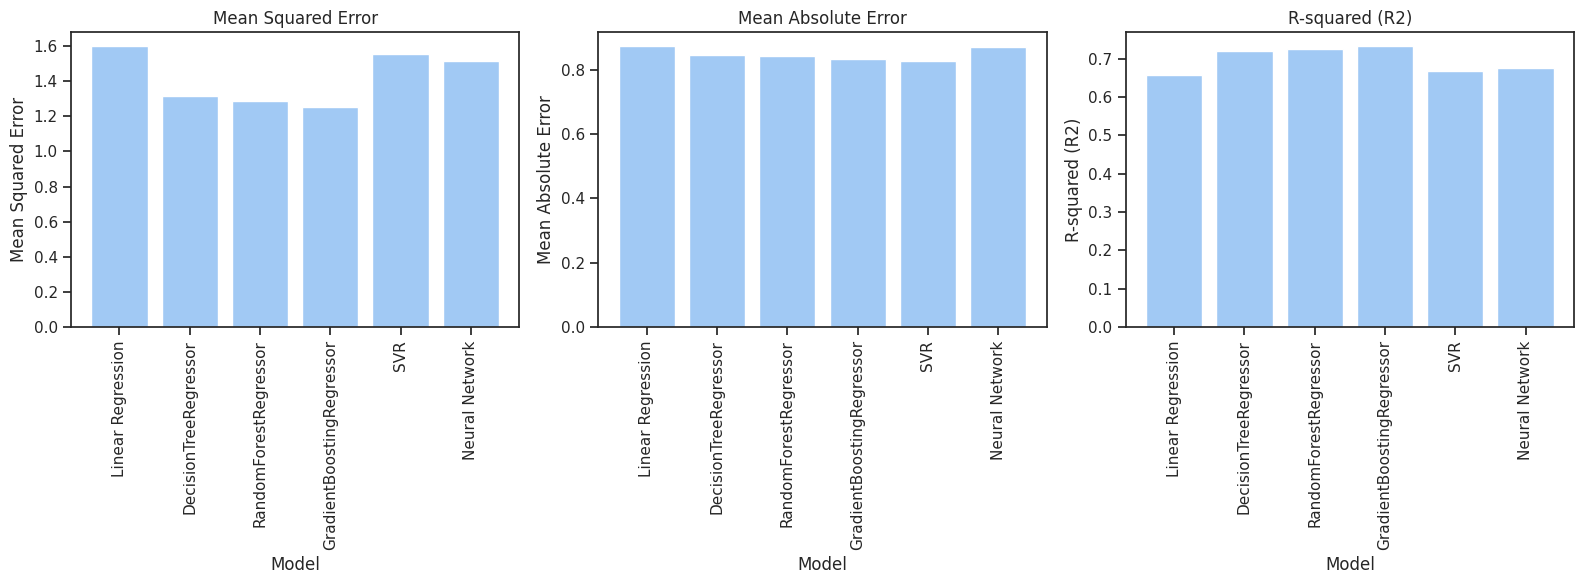

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms']]
y = combined_df['accommodates']

# Encode categorical features
encoder = LabelEncoder()
X['property_type'] = encoder.fit_transform(X['property_type'])
X['room_type'] = encoder.fit_transform(X['room_type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (bedrooms)
scaler = StandardScaler()
X_train['bedrooms'] = scaler.fit_transform(X_train[['bedrooms']])
X_test['bedrooms'] = scaler.transform(X_test[['bedrooms']])

# Train and evaluate each model
models = {
    'Linear Regression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Neural Network': keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with 1 neuron for regression task
    ])
}

evaluation_results = {}
for model_name, model in models.items():
    if model_name == 'Neural Network':
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[model_name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared (R2)': r2
    }

# Plot the evaluation metrics with vertical x-axis labels
metric_names = list(evaluation_results['Linear Regression'].keys())
num_metrics = len(metric_names)

fig, axs = plt.subplots(1, num_metrics, figsize=(16, 6))
for i, metric_name in enumerate(metric_names):
    metric_values = [evaluation_results[model_name][metric_name] for model_name in models.keys()]
    axs[i].bar(models.keys(), metric_values)
    axs[i].set_title(metric_name)
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(metric_name)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


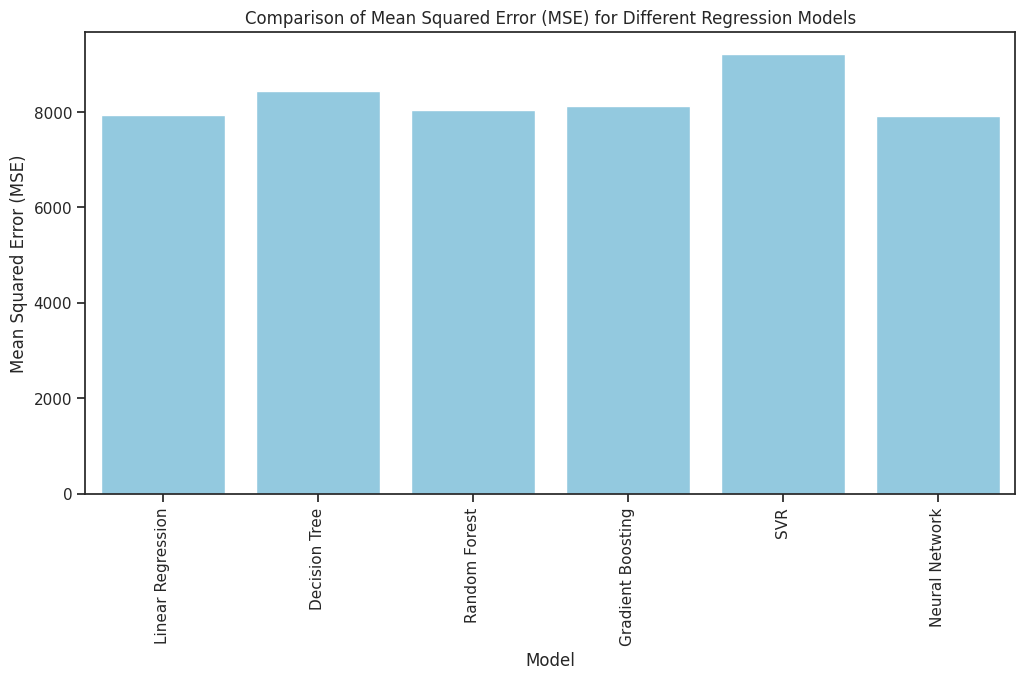

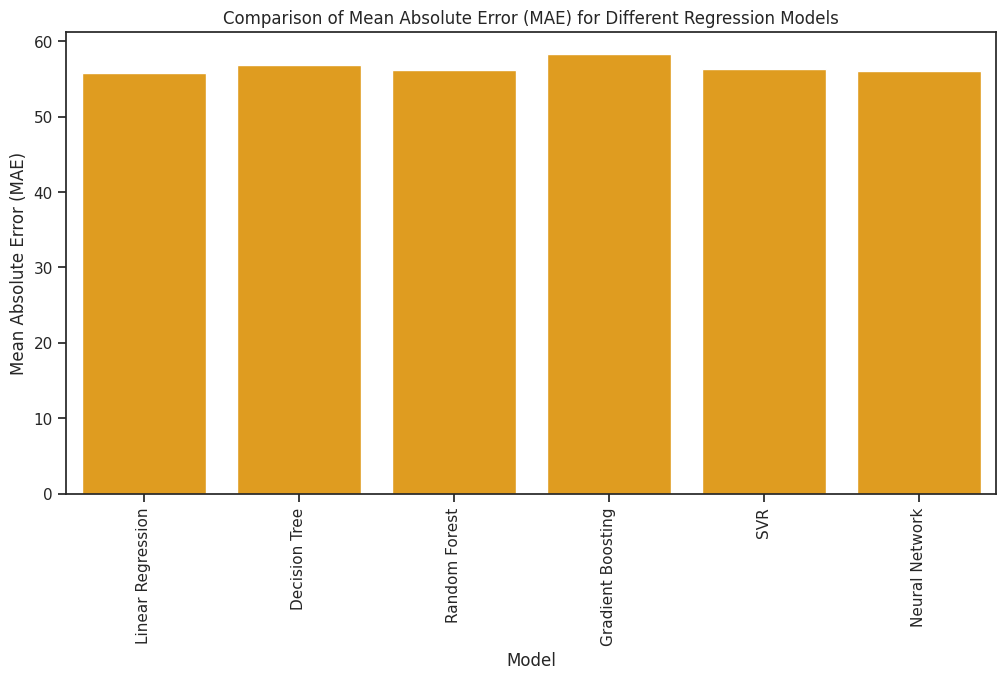

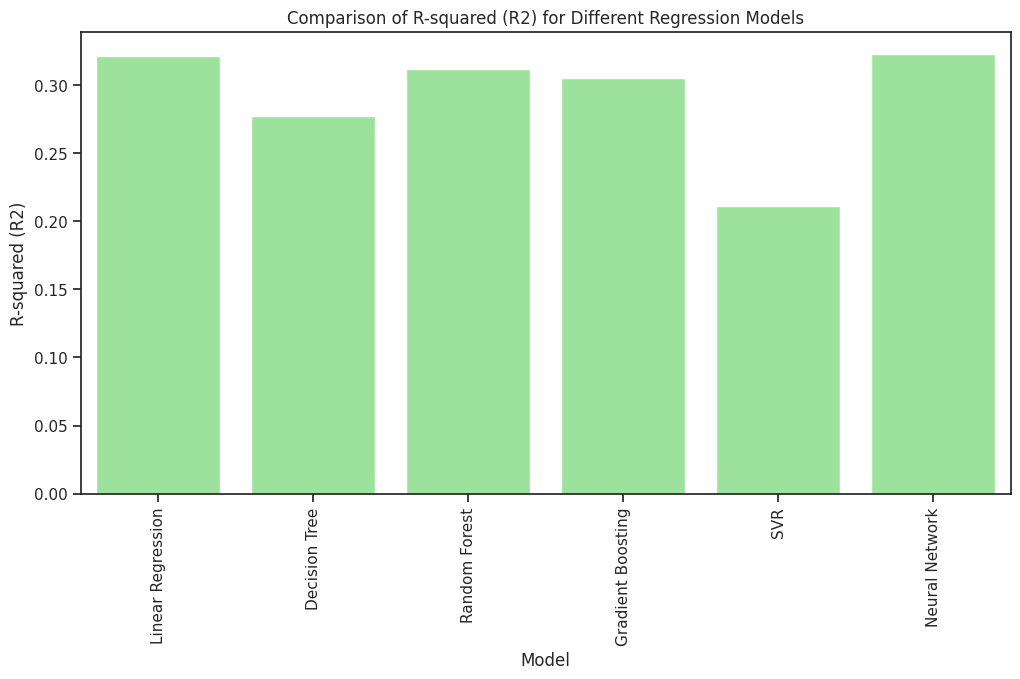

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['bedrooms', 'accommodates']]
X = pd.get_dummies(X, columns=['bedrooms'], drop_first=True)
X = pd.get_dummies(X, columns=['accommodates'], drop_first=True)
y = combined_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
svr = SVR()
neural_network = MLPRegressor()

# Train and evaluate the models
models = [
    ('Linear Regression', linear_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Gradient Boosting', gradient_boosting),
    ('SVR', svr),
    ('Neural Network', neural_network)
]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, mae, r2))

# Plot the results - MSE
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R2'])
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='MSE', color='skyblue')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regression Models')
plt.show()

# Plot the results - MAE
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='MAE', color='orange')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Different Regression Models')
plt.show()

# Plot the results - R2
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='R2', color='lightgreen')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) for Different Regression Models')
plt.show()


In [33]:
combined_df.shape

(5668, 58)

In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            5668 non-null   int64         
 1   listing_url                                   5668 non-null   object        
 2   last_scraped                                  5668 non-null   datetime64[ns]
 3   name                                          5668 non-null   object        
 4   description                                   5644 non-null   object        
 5   neighborhood_overview                         3386 non-null   object        
 6   picture_url                                   5668 non-null   object        
 7   host_id                                       5668 non-null   int64         
 8   host_name                                     5668 non-null   object

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare the feature matrix (X) and target vector (y)
X = combined_df[['property_type', 'room_type', 'bedrooms', 'accommodates']]
y = combined_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'mean', 'median', or 'most_frequent'

# Define column transformer to apply imputer and one-hot encoding to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, ['bedrooms']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
    ],
    remainder='passthrough'  # Keeps other columns as they are
)

# Create the pipeline with preprocessing and Random Forest Regressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, np.log1p(y_train))  # Apply logarithmic transformation to the target variable

# Make predictions on the test set
y_pred = np.expm1(model.predict(X_test))  # Inverse transform the predictions

# Evaluate the model using mean squared error, mean absolute error, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 7469.2189118795395
Mean Absolute Error: 50.99668143299208
R-squared: 0.3610017504574382
